# 1. Importing Libraries

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Loading the Dataset

In [112]:
print(data:=pd.read_csv("C:\\Users\\medo\\Downloads\\Salary_Data.csv"))

#This reads the dataset.csv file, which contains the columns YearsExperience and Salary.

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


# 3. Defining Mean Squared Error (MSE) 

In [113]:
def mean_squared_error(m, b, data):
    total_errors=0
    for i in range(len(data)):
        x=data.iloc[i].YearsExperience
        y=data.iloc[i].Salary
        total_errors += ( y - (m*x + b))**2
    return total_errors/ len(data)
    
    
#The function mean_squared_error(m, b, data) computes the error between the predicted salary (m*x + b) and the actual salary (y).
#It returns the squared error divided by the number of data points.

# 4. Gradient Descent Algorithm

In [114]:
def gradient_descent(m, b, data, L):
    m_gradient = 0
    b_gradient = 0

    n = len(data)

    for i in range(n):
        x=data.iloc[i].YearsExperience
        y=data.iloc[i].Salary
        
        m_gradient += -(2/n) * x * (y - (m * x + b))
        b_gradient += -(2/n) * (y - (m * x + b))

    new_m = m - m_gradient * L
    new_b = b - b_gradient * L

    return new_m, new_b

#Gradient Descent is the optimization algorithm used to minimize the mean squared error ......
# ...... and find the best parameters 𝑚 and 𝑏 (slope and intercept respectively).


# m= slope
# b= intercept
# L = learning rate (it is usually written as alpha but here I wrote L instead)

#Initialization: The algorithm starts by initializing the parameters 𝑚 and 𝑏 (usually to zero).
# Gradient Calculation: For each iteration, the gradients of the mean_squared_error function with respect to 𝑚 and 𝑏 are computed.
# Parameter Update: The parameters 𝑚 and 𝑏 are updated using the learning rate L .
# Repeat: This process is repeated for a set number of iterations, ......
# ...... reducing the mean_squared_error function and improving the accuracy of 𝑚 and 𝑏 untill we reach the best values.




# 5. Training the Model

In [115]:
m = 0
b = 0
L = 0.02
iterations = 1000

for i in range(iterations):
    m, b = gradient_descent(m, b, data, L)
    
best_slope = m
best_intersect = b

print(f"best slope value={m} & best intercept value={b}")
# training the model by running the gradient descent function for a specified number of iterations (1000)
# This updates the slope (𝑚) and intercept (𝑏) over time to fit the best possible line.

best slope value=9450.685086104793 & best intercept value=25787.32967952769


# 6. Making Predictions , Plotting real values of Salaries & Expected ones with respect to years of experience values   

[1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5]


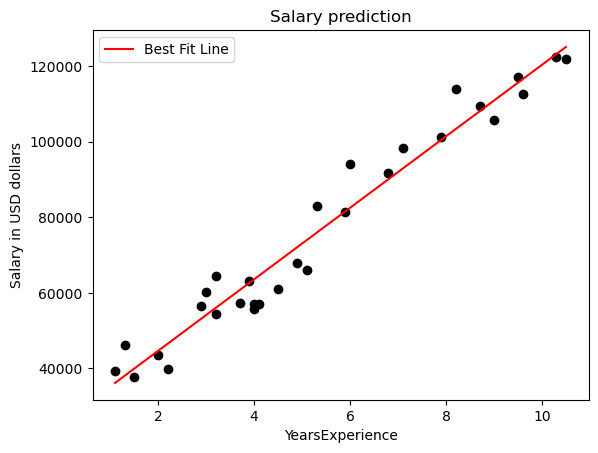

In [116]:
#Once the optimal values for 𝑚 and 𝑏 are found, you can make predictions using the linear regression equation



# Sample DataFrame
df = pd.DataFrame(data)

# Convert 'YearsExperience' column to list
new_y = df['YearsExperience'].tolist()
df = [m*x + b for x in df['YearsExperience']]
print(new_y)

#This step is to find expected salaries using linear regression equation (mx+b), and we have alredy found best values of m & b




plt.scatter(data.YearsExperience, data.Salary, color="black")
# To scatter real salaries against years of experience 

plt.plot(data.YearsExperience, df, color="red" ,label='Best Fit Line')
# This step used for drawing the line of expected salaries values using linear regression equation
# This is the best fit line


# Set the title
plt.title("Salary prediction")
# Set the x-axis label
plt.xlabel('YearsExperience')
# Set the y-axis label
plt.ylabel('Salary in USD dollars')
plt.legend()
plt.show()


# 7. Finding the best learning rate 
(I used it to find the value of L (learning rate) and I found that I can minimize the number of iterations from 1000 to 300 or 350 , but I didn't change iterations number used above, becauese 1000 is not considered large for our computers

Text(0.5, 1.0, 'Iterations WRT intersect (b) values')

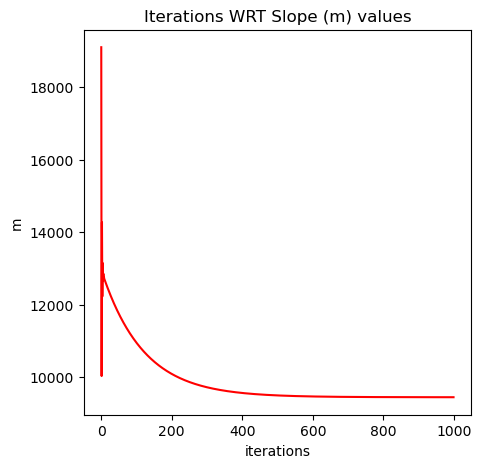

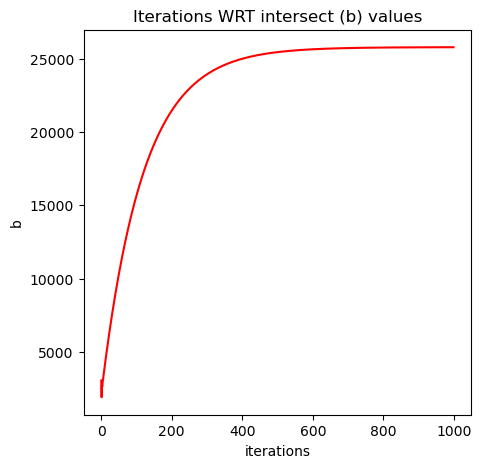

In [117]:
m = 0
b = 0
L = 0.02
iterations = 1000
list_m=[]
list_b=[]
for i in range(iterations):
    m, b = gradient_descent(m, b, data, L)
    list_m+=[m]
    list_b+=[b]

#iterations vs m-values
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iterations), list_m, 'r')
ax.set_xlabel('iterations')
ax.set_ylabel('m')
ax.set_title('Iterations WRT Slope (m) values')


# iterations vs b-values
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iterations), list_b, 'r')
ax.set_xlabel('iterations')
ax.set_ylabel('b')
ax.set_title( 'Iterations WRT intersect (b) values')

# 8. computing and visualizing the mean_squared_error function in 3D Graph

Visualizing is an optional task (just check it if it's correct or not)

 MSE-value = 31270956.85053166


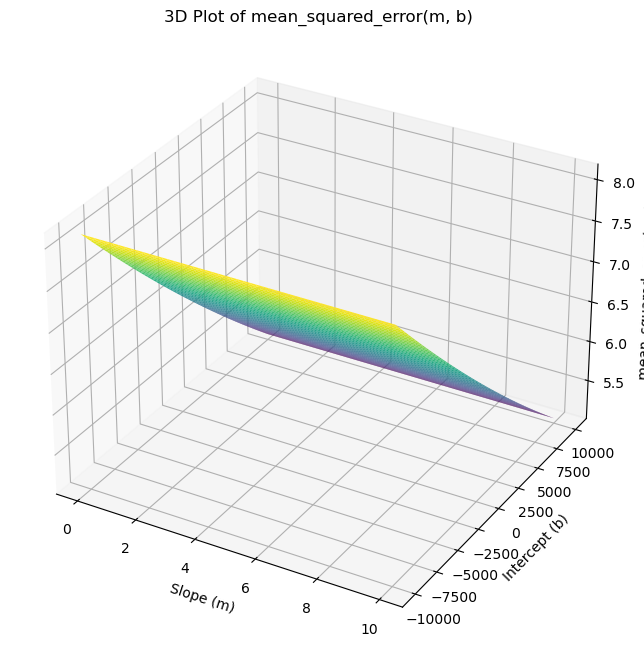

In [118]:
#computing mean_squared_error using the function in step 3 and the best ubdated values of m,b in step 5
print (f" MSE-value = {mean_squared_error(best_slope, best_intersect, data)}")



from mpl_toolkits.mplot3d import Axes3D

 
# Generate values for m and b to visualize the cost function in 3D
m_values = np.linspace(0, 10, 100)  # Range of slope values
b_values = np.linspace(-10000, 10000, 100)  # Range of intercept values

M, B = np.meshgrid(m_values, b_values)
costs = np.zeros(M.shape)

# Calculate the cost for each combination of m and b
for i in range(len(m_values)):
    for j in range(len(b_values)):
        costs[j, i] = mean_squared_error(m_values[i], b_values[j], data)

# Plotting the 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, costs, cmap='viridis')

# Labels and title
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('mean_squared_error(m, b)')
ax.set_title('3D Plot of mean_squared_error(m, b)')

plt.show()
